In [1]:
import nbimporter
import pandas as pd
import Convert_NRC as nrc
from header import EmotionAnalysis as ea

Importing Jupyter notebook from Convert_NRC.ipynb
Importing Jupyter notebook from /home/ellen/Documentos/TextMining/header/EmotionAnalysis.ipynb


In [2]:
nrc.create_emolex()

'File exists'

## Original

In [3]:
filepath = 'books/senhora.txt'

In [58]:
raw = ea.open_file(filepath)

In [68]:
tokens = ea.tokenize(raw)

In [6]:
filtered = ea.filter(tokens)

In [7]:
text = ea.convert_to_text(tokens)

In [8]:
dist = ea.tokens_frequency(filtered)

In [9]:
#ea.info(tokens, filtered)

In [10]:
freq = ea.most_frequent(filtered, dist, 20)

In [11]:
#print(f"20 palavras mais frequentes: {freq}")

In [12]:
#print(f"Palavra mais frequente: {dist.max()} - {dist[dist.max()]} vezes")

In [13]:
#print("Colocações significantes: \n")
#text.collocations()

In [14]:
#ea.context(text, dist)

In [15]:
wordList, emotionList = ea.emolex()

In [16]:
emoList = ea.newList(emotionList, filtered)

In [17]:
emotionCounts = ea.generate_count(wordList, filtered)

In [18]:
emotionCounts.most_common()

[('positivo', 4357),
 ('confiança', 2552),
 ('negativo', 2373),
 ('antecipação', 2002),
 ('alegria', 1796),
 ('tristeza', 1469),
 ('medo', 1312),
 ('raiva', 1011),
 ('surpresa', 789),
 ('nojo', 752)]

In [19]:
wordCounts = ea.generate_count(emoList, filtered)

In [20]:
wordCounts.most_common(20)

[('amor', 2178),
 ('moça', 1620),
 ('mãe', 1260),
 ('casamento', 1199),
 ('esperança', 690),
 ('senhor', 666),
 ('doce', 660),
 ('boa', 600),
 ('liberdade', 600),
 ('surpresa', 589),
 ('dinheiro', 539),
 ('corte', 480),
 ('paixão', 462),
 ('segredo', 460),
 ('destino', 456),
 ('deus', 448),
 ('moral', 420),
 ('sorte', 416),
 ('canto', 390),
 ('verdade', 385)]

In [21]:
for w in wordCounts.most_common(20):
    print(w[0])
    print(wordList[w[0]])
    print('------------------------------------')

amor
['positivo', 'antecipação', 'alegria', 'tristeza', 'confiança']
------------------------------------
moça
['positivo', 'confiança']
------------------------------------
mãe
['positivo', 'negativo', 'antecipação', 'alegria', 'tristeza', 'confiança']
------------------------------------
casamento
['positivo', 'antecipação', 'alegria', 'confiança']
------------------------------------
esperança
['positivo', 'antecipação', 'alegria', 'surpresa', 'confiança']
------------------------------------
senhor
['positivo', 'confiança']
------------------------------------
doce
['positivo', 'antecipação', 'alegria', 'surpresa', 'confiança']
------------------------------------
boa
['positivo', 'alegria', 'surpresa', 'confiança']
------------------------------------
liberdade
['positivo', 'antecipação', 'alegria', 'surpresa', 'confiança']
------------------------------------
surpresa
['positivo', 'medo', 'alegria', 'surpresa']
------------------------------------
dinheiro
['positivo', 'antecipaç

# Testes

In [22]:
import nltk
from collections import OrderedDict, defaultdict, Counter
import numpy as np
from nltk.tokenize import sent_tokenize, word_tokenize

In [23]:
text.concordance("casamento")

Displaying 25 of 25 matches:
 velho batendo a cabeça . - de meu casamento ! disse aurélia com a maior frieza
as possui alguma cousa ; ajustou o casamento da filha adelaide com um moço que 
eciso quanto antes desmanchar este casamento . a adelaide deve casar com o dr. 
rate agora dos preparativos para o casamento que está justo há perto de um ano 
cebo ! exclamou o velho rindo . um casamento romântico . - não , senhor ; nada 
ial , ia passando sem esperança de casamento , não era ela , mas a mãe , d. cam
 um momento para outro arranjar um casamento vantajoso , como tinham conseguido
a uma razão sólida para rejeitar o casamento proposto , não vira lemos na prime
 - um dote de cem contos no ato do casamento , é isto ? - resta-me conhecer a p
to ao dote , depois de realizado o casamento , este sim , garanto . - não pode 
; fernando concordou com prazer no casamento . - já era tempo , disse a boa sen
 ao canto . a ruptura do ajuste de casamento , que em outra circunstância porve
qual o mari

In [24]:
text.similar("casamento")

marido amor coração moço braço que homem espírito olhar ouro papel
baile velho lemos dia tempo dinheiro pensamento gesto senhor


In [25]:
text.common_contexts([freq[0][0], freq[1][0]])

de_e de_o de_a de_com que_a de_sua de_no de_se de_na
perguntou_sorrindo de_em de_uma a_a a_e tornou_com de_não de_que
de_mas que_deixara a_um


In [26]:
sortedToken = sorted(list(set(filtered)), key=lambda token: dist[token], reverse=True)
text.dispersion_plot(sortedToken[:6])

<Figure size 640x480 with 1 Axes>

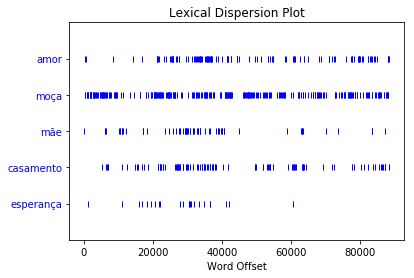

In [27]:
wordArray = np.asarray(wordCounts.most_common(5))
wordArray = [i[0] for i in wordArray]
text.dispersion_plot(wordArray)

## Tratar plural

In [47]:
import re
s = re.compile('s$')
oes = re.compile('ões$|ãos$|ães$')
res = re.compile('res$')
zes = re.compile('zes$')
ses = re.compile('ses$')
ais = re.compile('ais$')
eis = re.compile('éis$')
ois = re.compile('óis$')
uis = re.compile('uis$')
eis = re.compile('is$|eis$')
ns = re.compile('ns$')
nes = re.compile('nes$')

In [48]:
def singularize(tokens):
    new_t = []
    
    for t in tokens:
        if t.endswith('ões') | t.endswith('ãos') | t.endswith('ães') :
            new_t.append(re.sub(oes, 'ão', t))
        elif t.endswith('res'):
            new_t.append(re.sub(res, 'r', t))
        elif t.endswith('zes'):
            new_t.append(re.sub(zes, 'z', t))
        elif t.endswith('ses'):
            new_t.append(re.sub(ses, 's', t))
        elif t.endswith('ais'):
            new_t.append(re.sub(ais, 'al', t))
        elif t.endswith('éis'):
            new_t.append(re.sub(eis, 'el', t))
        elif t.endswith('óis'):
            new_t.append(re.sub(ois, 'ol', t))
        elif t.endswith('uis'):
            new_t.append(re.sub(uis, 'ul', t))
        elif t.endswith('is') | t.endswith('eis') :
            new_t.append(re.sub(eis, 'il', t))
        elif t.endswith('ns'):
            new_t.append(re.sub(ns, 'm', t))
        elif t.endswith('nes'):
            new_t.append(re.sub(nes, 'n', t))
        elif t.endswith('s'):
            new_t.append(re.sub(s, '', t))
        else:
            new_t.append(t)
            
    return new_t

In [49]:
singular = singularize(new_tokens)

## Tratar negação

In [28]:
def filter(tokens):
    stopwords = nltk.corpus.stopwords.words('portuguese')
    stopwords = [s for s in stopwords if s != 'não']
    
    
    filtered = [t for t in tokens 
                if t not in stopwords 
                and t.isalpha() 
                and len(t) > 1]
    return filtered

In [29]:
new_tokens = filter(tokens)
new_tokens

['anos',
 'raiou',
 'céu',
 'fluminense',
 'nova',
 'estrela',
 'desde',
 'momento',
 'ascensão',
 'ninguém',
 'disputou',
 'cetro',
 'proclamada',
 'rainha',
 'salões',
 'deusa',
 'bailes',
 'musa',
 'poetas',
 'ídolo',
 'noivos',
 'disponibilidade',
 'rica',
 'formosa',
 'duas',
 'opulências',
 'realçam',
 'flor',
 'vaso',
 'alabastro',
 'dois',
 'esplendores',
 'refletem',
 'raio',
 'sol',
 'prisma',
 'diamante',
 'não',
 'recorda',
 'aurélia',
 'camargo',
 'atravessou',
 'firmamento',
 'corte',
 'brilhante',
 'meteoro',
 'repente',
 'meio',
 'deslumbramento',
 'produzira',
 'dezoito',
 'anos',
 'apareceu',
 'primeira',
 'vez',
 'sociedade',
 'não',
 'conheciam',
 'logo',
 'buscaram',
 'todos',
 'avidez',
 'informações',
 'acerca',
 'grande',
 'novidade',
 'dia',
 'muita',
 'coisa',
 'não',
 'repetirei',
 'agora',
 'pois',
 'tempo',
 'saberemos',
 'verdade',
 'comentos',
 'malévolos',
 'usam',
 'noveleiros',
 'aurélia',
 'órfã',
 'companhia',
 'velha',
 'parenta',
 'viúva',
 'firmin

In [30]:
def generate_count(t):
    emoCount = Counter()
    for i in range(len(t) - 1):
        if len(wordList[t[i]]) > 0:
            if t[i-1] == 'não':
                emoCount += Counter(revert_emotion(wordList[t[i]]))
            else:
                emoCount += Counter(wordList[t[i]])
    return emoCount

In [31]:
def revert_emotion(wordList):
    newList = []
    for w in wordList:
        if w == 'positivo':
            newList.append('negativo')
        elif w == 'negativo':
            newList.append('positivo')
        elif w == 'alegria':
            newList.append('tristeza')
        elif w == 'tristeza':
            newList.append('alegria')
        elif w == 'antecipação':
            newList.append('surpresa')
        elif w == 'surpresa':
            newList.append('antecipação')
        elif w == 'medo':
            newList.append('raiva')
        elif w == 'raiva':
            newList.append('medo')
        elif w == 'nojo':
            newList.append('confiança')
        elif w == 'confiança':
            newList.append('nojo')
    return newList

In [32]:
generate_count(tokens).most_common()

[('positivo', 4413),
 ('confiança', 2560),
 ('negativo', 2469),
 ('antecipação', 2005),
 ('alegria', 1847),
 ('tristeza', 1567),
 ('medo', 1417),
 ('raiva', 1120),
 ('nojo', 850),
 ('surpresa', 786)]

In [33]:
generate_count(new_tokens).most_common()

[('positivo', 4359),
 ('confiança', 2526),
 ('negativo', 2371),
 ('antecipação', 1983),
 ('alegria', 1810),
 ('tristeza', 1455),
 ('medo', 1301),
 ('raiva', 1022),
 ('surpresa', 808),
 ('nojo', 778)]

In [34]:
emotionCounts.most_common()

[('positivo', 4357),
 ('confiança', 2552),
 ('negativo', 2373),
 ('antecipação', 2002),
 ('alegria', 1796),
 ('tristeza', 1469),
 ('medo', 1312),
 ('raiva', 1011),
 ('surpresa', 789),
 ('nojo', 752)]

In [162]:
def negations():
    new_t = tokens.copy()
    for i in range(0,len(tokens)):
        if tokens[i] == 'não':
            new_t[i:i+2] = [' '.join(new_t[i:i+2])]
    return new_t

In [165]:
tkns = negations()
filter_tkns = ea.filter(tkns)
singular_tkns = singularize(filter_tkns)

In [166]:
print(len(tokens))
print(len(tkns))
print(len(filter_tkns))
print(len(singular_tkns))

88243
87053
37327
37327


In [167]:
generate_count(singular_tkns).most_common()

[('positivo', 4845),
 ('confiança', 2806),
 ('negativo', 2493),
 ('antecipação', 2221),
 ('alegria', 1944),
 ('tristeza', 1562),
 ('medo', 1417),
 ('raiva', 1045),
 ('surpresa', 878),
 ('nojo', 790)]

## Tratar gênero dos adjetivos

In [68]:
from treetagger import TreeTagger
tt_en = TreeTagger(encoding='utf-8', language='english')
tt_pt = TreeTagger(encoding='utf-8', language='portuguese')

TypeError: __init__() got an unexpected keyword argument 'encoding'

## Tratar verbos